# COURSE: A deep understanding of deep learning
## SECTION: Weight inits and investigations
### LECTURE: CodeChallenge: Identically random weights
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [79]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import copy

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/4x/pds2gxg17h57rrp30d736s1w0000gn/T/ipykernel_63201/1009634590.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [80]:
# create a model
net = nn.Sequential(
    nn.Linear(2,8),  # input layer
    nn.Linear(8,1),  # hidden layer
    nn.Linear(1,1),  # output unit
   )

# Create the four networks

In [81]:
### NO RANDOM SEED

# create a "template" network
net_noseed = copy.deepcopy( net )
# update the weights
for p in net_noseed.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [82]:
### RANDOM SEED 1a

# create a "template" network
net_rs1a = copy.deepcopy( net )

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1a.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [83]:
### RANDOM SEED 2

# create a "template" network
net_rs2 = copy.deepcopy( net )

# set the seed to 2
torch.manual_seed(2)

# update the weights
for p in net_rs2.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [84]:
### RANDOM SEED 1b

# create a "template" network
net_rs1b = copy.deepcopy( net )

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1b.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

# Extract all weights from all networks

In [85]:
# initialize empty arrays
w_ns = np.array([])
w_1a = np.array([])
w_2  = np.array([])
w_1b = np.array([])

# loop over layers in the models
for i in range(3):

  # extract the vectorized weights matrices
  w_ns = np.append(w_ns,net_noseed[i].weight.view(-1).detach().numpy())
  w_1a = np.append(w_1a,  net_rs1a[i].weight.view(-1).detach().numpy())
  w_2  = np.append(w_2 ,   net_rs2[i].weight.view(-1).detach().numpy())
  w_1b = np.append(w_1b,  net_rs1b[i].weight.view(-1).detach().numpy())

# check the vector
w_ns

array([ 0.00462545,  0.4399282 ,  0.39322874, -0.64863265, -0.52780831,
        0.18334493,  0.18266469,  0.11532091, -0.43928766,  0.59318143,
        0.38224319, -0.12545398,  0.31305701, -0.6514709 ,  0.71953773,
        0.04193521, -0.24074629,  0.30307645, -0.18947838,  1.1997596 ,
        0.00376317,  0.59964669,  0.44793981,  0.08903494, -0.75253475])

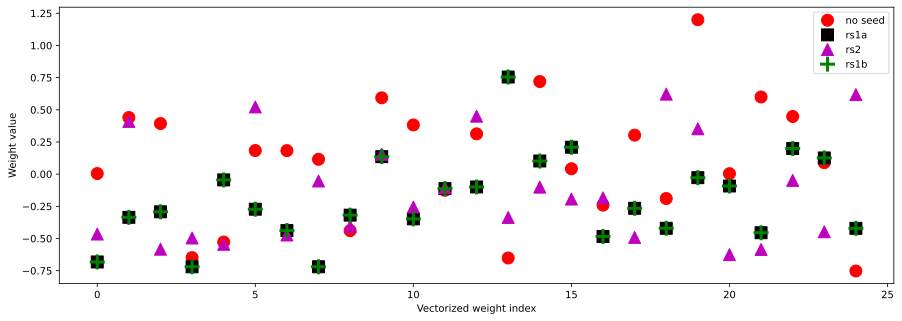

In [86]:
# plotting

fig = plt.figure(figsize=(15,5))

plt.plot(w_ns,'ro',markersize=12,label='no seed')
plt.plot(w_1a,'ks',markersize=12,label='rs1a')
plt.plot(w_2 ,'m^',markersize=12,label='rs2')
plt.plot(w_1b,'g+',markersize=15,label='rs1b',markeredgewidth=3)
plt.legend()
plt.xlabel('Vectorized weight index')
plt.ylabel('Weight value')

plt.show()

In [87]:
# the algebraic test

print('1a-1b should be zeros:')
print( w_1a-w_1b )
print('\n\n')

print('1a-2 should be non-zeros:')
print( w_1a-w_2 )
print('\n\n')

print('1a-ns should be non-zeros:')
print( w_1a-w_ns )
print('\n\n')

1a-1b should be zeros:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]



1a-2 should be non-zeros:
[-0.21680683 -0.74543169  0.29078263 -0.22352028  0.50025795 -0.79460078
  0.03471264 -0.66646316  0.08751759 -0.01855947 -0.09211737 -0.00731025
 -0.55001728  1.09119886  0.20277754  0.40263602 -0.29967313  0.22609788
 -1.04223195 -0.37989978  0.53314489  0.12994796  0.2475912   0.57373706
 -1.03930008]



1a-ns should be non-zeros:
[-0.6868927  -0.77544206 -0.68569788 -0.0711509   0.48301218 -0.4557825
 -0.62083218 -0.83493065  0.1208069  -0.45735283 -0.72986871  0.01299994
 -0.41245939  1.40597093 -0.61738289  0.16719775 -0.24367303 -0.56850207
 -0.23115139 -1.227219   -0.09592727 -1.05485183 -0.24881132  0.0369795
  0.3313396 ]





In [88]:
bias_ns = np.array([])
bias_2 = np.array([])
bias_1a = np.array([])
bias_1b = np.array([])
for i in range(3):
    bias_1a = np.append(bias_1a,  net_rs1a[i].bias.view(-1).detach().numpy())
    bias_1b = np.append(bias_1b,  net_rs1b[i].bias.view(-1).detach().numpy())
    bias_ns = np.append(bias_ns,  net_noseed[i].bias.view(-1).detach().numpy())
    bias_2 =  np.append(bias_2,    net_rs2[i].bias.view(-1).detach().numpy())   

In [89]:
print(bias_1a)
print(bias_1b)
print(bias_ns)
print(bias_2)

[ 0.38370019 -0.17188162  0.70431334  0.56680864 -0.03310931 -0.47198182
  0.4306013   0.2194556  -0.26831812  0.54400456]
[ 0.38370019 -0.17188162  0.70431334  0.56680864 -0.03310931 -0.47198182
  0.4306013   0.2194556  -0.26831812  0.54400456]
[ 0.38370019 -0.17188162  0.70431334  0.56680864 -0.03310931 -0.47198182
  0.4306013   0.2194556  -0.26831812  0.54400456]
[ 0.38370019 -0.17188162  0.70431334  0.56680864 -0.03310931 -0.47198182
  0.4306013   0.2194556  -0.26831812  0.54400456]


# Additional explorations

In [90]:
# 1) The code here only fixed the *weights*, not the biases. Does that mean that net_rs1a and net_rs1b are actually
#    DIFFERENT networks??
# MY COMMENTS: All models are deep copies of net, hence have same biases
# generator for biases for both 1a and 1b is same.
# 2) Change the code to plot/subtract the biases instead of the weights. Are the results what you expected? If not,
#    figure out why!
# MY COMMENTS: All models are deep copies of net, hence have same biasess